<a href="https://colab.research.google.com/github/roraashibaa39-glitch/RCar_price/blob/main/Car%F0%9F%9A%98r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor as DTR

In [2]:
!git clone https://github.com/alexeygrigorev/mlbookcamp-code

Cloning into 'mlbookcamp-code'...
remote: Enumerating objects: 4489, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 4489 (delta 45), reused 33 (delta 33), pack-reused 4434 (from 1)
Receiving objects: 100% (4489/4489), 9.03 MiB | 9.26 MiB/s, done.
Resolving deltas: 100% (2720/2720), done.


In [3]:
car_df = pd.read_csv('/content/mlbookcamp-code/chapter-02-car-price/data.csv')

In [4]:
car_df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Some Cleaning

In [6]:
car_df.columns = car_df.columns.str.lower().str.replace(' ','_')

In [7]:
car_df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
car_df.rename(columns={'msrp': 'price'}, inplace=True)

In [9]:
car_df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


**Analysis**

In [10]:
pd.options.display.float_format = '{:,.2f}'.format
car_df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


In [11]:
car_df.describe(include=['O'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


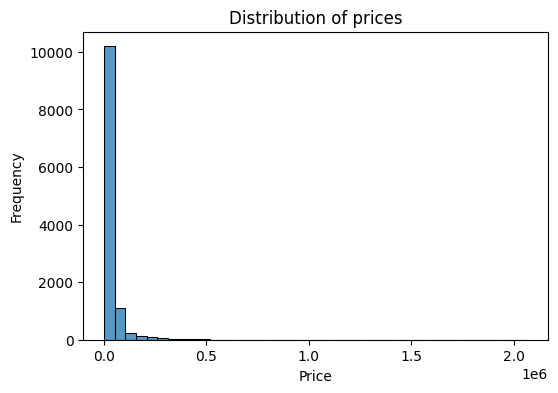

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(car_df.price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

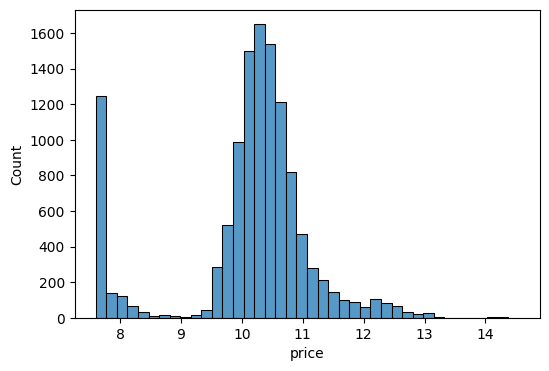

In [13]:
car_df['price'] = np.log1p(car_df.price)
plt.figure(figsize=(6, 4))
sns.histplot(car_df.price, bins=40)
plt.show()

In [14]:
for col in car_df.columns:
    print( col,':', car_df[col].nunique() )
    print(car_df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

make : 48
make
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: count, dtype: int64

********************

model : 915
model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: count, dtype: int64

********************

year : 28
year
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: count, dtype: int64

********************

engine_fuel_type : 10
engine_fuel_type
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: count, dtype: int64

********************

engine_hp : 356
engine_hp
200.00    456
170.00    351
210.00    320
240.00    268
285.00    246
Name: count, dtype: int64

********************

engine_cylinders : 9
engine_cylinders
4.00     4752
6.00     4489
8.00     2031
12.00  

From the dataset we noticed that the price column depend on this  features minly:

* make
* model
* year
* engine_hp
* engine_cylinders
* vehicle_size

In [15]:
print(car_df.isnull().sum())

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
dtype: int64


In [16]:
car_df['engine_hp']=car_df['engine_hp'].fillna(car_df['engine_hp'].mean())
car_df['engine_cylinders']=car_df['engine_cylinders'].fillna(car_df['engine_cylinders'].mean())
car_df['number_of_doors']=car_df['number_of_doors'].fillna(car_df['number_of_doors'].mean())

In [17]:
car_df = car_df.drop(['market_category','engine_fuel_type','city_mpg','highway_mpg','transmission_type','driven_wheels','vehicle_style','popularity'], axis=1)

In [18]:
print(car_df.head(5))

  make       model  year  engine_hp  engine_cylinders  number_of_doors  \
0  BMW  1 Series M  2011     335.00              6.00             2.00   
1  BMW    1 Series  2011     300.00              6.00             2.00   
2  BMW    1 Series  2011     300.00              6.00             2.00   
3  BMW    1 Series  2011     230.00              6.00             2.00   
4  BMW    1 Series  2011     230.00              6.00             2.00   

  vehicle_size  price  
0      Compact  10.74  
1      Compact  10.61  
2      Compact  10.50  
3      Compact  10.29  
4      Compact  10.45  


Encoding using get dummies

In [19]:
car_df = pd.get_dummies(car_df, columns=['make','model','vehicle_size'])


In [20]:
car_df.head()

,year,engine_hp,engine_cylinders,number_of_doors,price,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,...,model_iA,model_iM,model_iQ,model_tC,model_xA,model_xB,model_xD,vehicle_size_Compact,vehicle_size_Large,vehicle_size_Midsize
0,2011,335.00,6.00,2.00,10.74,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,2011,300.00,6.00,2.00,10.61,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,2011,300.00,6.00,2.00,10.50,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,2011,230.00,6.00,2.00,10.29,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,2011,230.00,6.00,2.00,10.45,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [21]:
x = car_df.drop('price', axis=1)
y = car_df['price']

In [22]:
x.head()

,year,engine_hp,engine_cylinders,number_of_doors,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,...,model_iA,model_iM,model_iQ,model_tC,model_xA,model_xB,model_xD,vehicle_size_Compact,vehicle_size_Large,vehicle_size_Midsize
0,2011,335.00,6.00,2.00,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,2011,300.00,6.00,2.00,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,2011,300.00,6.00,2.00,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,2011,230.00,6.00,2.00,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,2011,230.00,6.00,2.00,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
y.head()

,price
0,10.74
1,10.61
2,10.50
3,10.29
4,10.45




Train Test split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Modeling using: Linear Regression

In [25]:
model = LR()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred_train = model.predict(x_train)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"RMSE (Root Mean Squared Error) on training data: {rmse_train}")
print(f"R^2 Score on training data: {r2_train}")

RMSE (Root Mean Squared Error) on training data: 0.1740306191819665
R^2 Score on training data: 0.9750076121507755


Modeling using: Decision Tree

In [27]:
Model = DTR()
Model.fit(x_train, y_train)

DecisionTreeRegressor()

In [28]:
new_pred = Model.predict(x_train)

new_mse = mean_squared_error(y_train, new_pred)
new_rmse = np.sqrt(new_mse)
new_r2 = r2_score(y_train, new_pred)

print(f"RMSE (Root Mean Squared Error) on training data: {new_rmse}")
print(f"R^2 Score on training data: {new_r2}")

RMSE (Root Mean Squared Error) on training data: 0.07325477265897157
R^2 Score on training data: 0.995571789361248


Predict on Test

In [29]:
pred_test = Model.predict(x_test)

mse_test = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, pred_test)

print(f"RMSE (Root Mean Squared Error) on training data: {rmse_test}")
print(f"R^2 Score on Decision Tree: {r2_test}")

RMSE (Root Mean Squared Error) on training data: 0.10960143827089384
R^2 Score on Decision Tree: 0.9905002140533229
